In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)

In [28]:
df = pd.read_csv("D:\Portfolio_dataset\Telco-Customer-Churn.csv")
print(df.shape)
print(df.columns.tolist())
print(df.head())

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             

In [29]:
# Strip spaces in column names
df.columns = df.columns.str.strip()

In [35]:
# Convert TotalCharges to numeric (fixes string issue)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [36]:
# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

In [32]:
print(df[['MonthlyCharges', 'TotalCharges', 'Churn']].head())

   MonthlyCharges  TotalCharges Churn
0           29.85         29.85    No
1           56.95       1889.50    No
2           53.85        108.15   Yes
3           42.30       1840.75    No
4           70.70        151.65   Yes


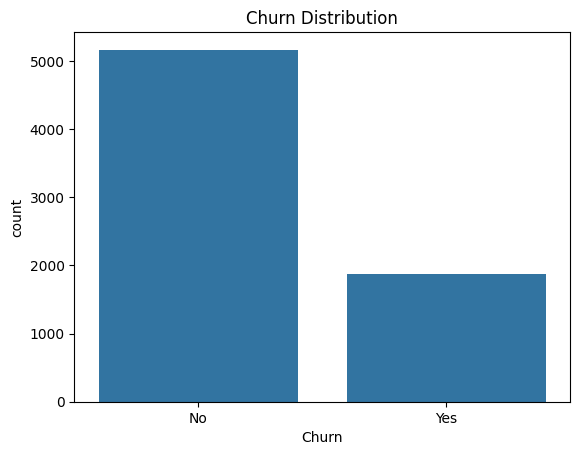

In [37]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

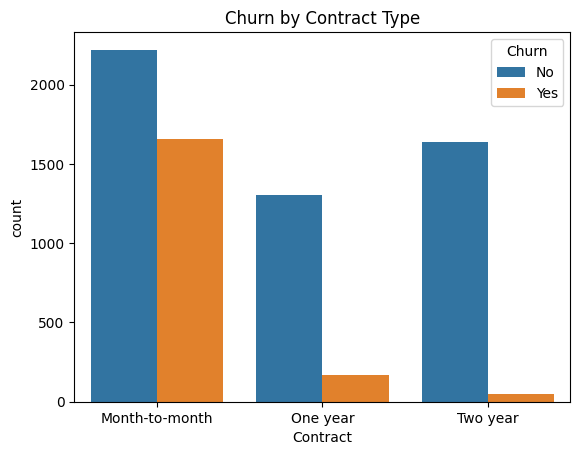

In [38]:
# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

In [39]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [40]:
# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [42]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [43]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Logistic Regression
y_pred_log = logreg.predict(X_test)
print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


=== Logistic Regression ===
[[1375  174]
 [ 257  304]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [45]:
y_pred_rf = rf.predict(X_test)
print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
[[1387  162]
 [ 289  272]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



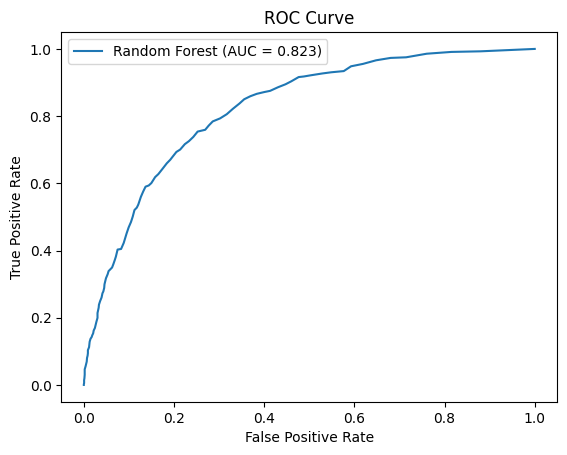

In [46]:
# ROC Curve for Random Forest
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Random Forest (AUC = %.3f)" % roc_auc_score(y_test, y_pred_prob))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

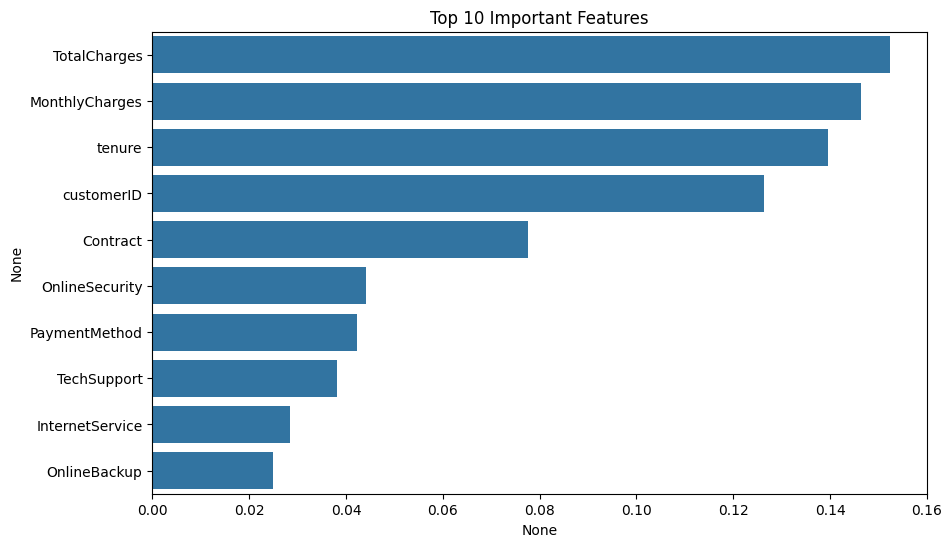

In [47]:
importances = rf.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title("Top 10 Important Features")
plt.show()